In [2]:
# ! pip install --user pandas
# ! pip install Jinja2 --user pandas
# ! pip install currencyconverter --user pandas
# ! pip install matplotlib --user pandas

# Hotels in Munnar, Kerala (MakeMyTrip)
fonte: https://www.kaggle.com/datasets/andrewgeorgeissac/hotels-in-munnar-kerala

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from currency_converter import CurrencyConverter
from IPython.display import display

In [3]:
df = pd.read_csv('./data/munnar.csv')
df.head()

,Hotel Name\t\t\t\t\t\t\t\t\t,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,"2,728",574
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,"4,451",969
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,"2,758",684
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,"2,675",756
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,"3,203",654


In [4]:
# tratando dados
df.rename(columns={'Hotel Name\t\t\t\t\t\t\t\t\t': 'Name'}, inplace=True)

df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype(float)


def converter_para_metros(distancia):
    try:
        valor, unidade = distancia.split()
        valor = float(valor)
        if unidade.lower() == 'km':
            return valor * 1000  
        elif unidade.lower() == 'm':
            return valor  
    except:
        pass
    
    return None

df['Distance in Meters'] = df['Distance to Landmark'].apply(converter_para_metros)



df.head()

,Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax,Distance in Meters
0,Gokulam Park,4.1,Very Good,1058,4.0,Chithirapuram,city centre,10.2 km,2728.0,574,10200.0
1,Sterling Munnar,3.8,Very Good,1088,4.0,Chinnakanal,city centre,19.2 km,4451.0,969,19200.0
2,Issacs Residency,4.1,Very Good,322,3.0,Central Munnar,Attukal Waterfalls,950 m,2758.0,684,950.0
3,Tea Valley Resort,4.3,Excellent,1337,4.0,Pallivasal,city centre,4.8 km,2675.0,756,4800.0
4,Grand Plaza,4.3,Excellent,1058,4.0,Moolakadai,Attukal Waterfalls,1.9 km,3203.0,654,1900.0


# dados básicos do arquivo

In [6]:
quantidade_registros = len(df)
nota_minimo = df['Rating'].min()
nota_maximo = df['Rating'].max()
valor_minimo = df['Price'].min()
valor_maximo = df['Price'].max()
distancia_minimo = df['Distance in Meters'].min()
distancia_maximo = df['Distance in Meters'].max()


df_resumo = pd.DataFrame({'Registros':[quantidade_registros],
                          'Colunas':[df.shape[1]], 
                          'Menor nota': [nota_minimo], 
                          'Maior nota': [nota_maximo], 
                          'menor valor': [valor_minimo], 
                          'Maior valor': [valor_maximo],
                          'menor distância': [distancia_minimo], 
                          'Maior distância': [distancia_maximo],                           
                            })
df_resumo

,Registros,Colunas,Menor nota,Maior nota,menor valor,Maior valor,menor distância,Maior distância
0,74,11,2.8,4.8,930.0,11974.0,440.0,23800.0


In [7]:
contagem_rating = df['Star Rating'].value_counts()
contagem_rating = contagem_rating.sort_index(ascending=True)
contagem_rating

2.0     1
3.0    18
4.0    23
5.0    15
Name: Star Rating, dtype: int64

# Valores

In [9]:
qtd_ate_2000 = (df['Price'] < 2000).sum()
med_ate_2000 = df[df['Price'] < 2000]['Price'].mean()

qtd_entre_2000_e_7000 = ((df['Price'] >= 2000) & (df['Price'] <= 7000) ).sum()
med_entre_2000_e_7000 = df[(df['Price'] >= 2000) & (df['Price'] <= 7000)  ]['Price'].mean()

qtd_acima_de_7000 = (df['Price'] > 7000).sum()
med_acima_de_7000 = df[df['Price'] > 7000]['Price'].mean()


print('Valor min:', [valor_minimo], ' max:', [valor_maximo] )

estatisticas = pd.DataFrame({
    '': ['Até 2000', 'entre 2000 e 7000', 'maiores que 7000'],
    'Quantidade': [qtd_ate_2000, qtd_entre_2000_e_7000, qtd_acima_de_7000 ],
    'Média de Preço': [med_ate_2000, med_entre_2000_e_7000 , med_acima_de_7000]
})

estatisticas


Valor min: [930.0]  max: [11974.0]


,,Quantidade,Média de Preço
0,Até 2000,13,1367.076923
1,entre 2000 e 7000,50,3469.360000
2,maiores que 7000,11,9404.181818


In [10]:
# Calcula a média ponderada
soma_rating_multiplicado_por_count = (df['Rating'] * df['Reviews']).sum()
soma_rating_count = df['Reviews'].sum()

media_ponderada = soma_rating_multiplicado_por_count / soma_rating_count

# Exibe a média ponderada
print(f"A média ponderada é: {media_ponderada}")


A média ponderada é: 4.133585041352031


# Gráficos

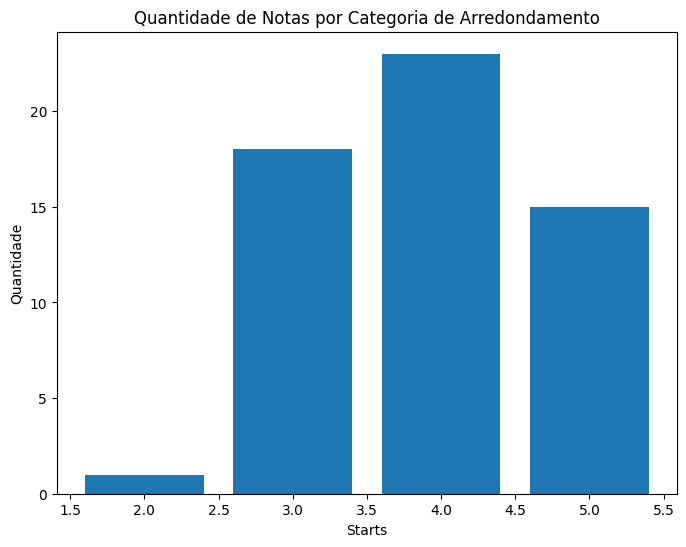

In [11]:
contagem_notas = df['Star Rating'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(contagem_notas.index, contagem_notas.values)

plt.xlabel('Starts')
plt.ylabel('Quantidade')
plt.title('Quantidade de Notas por Categoria de Arredondamento')

plt.show()

C:\Users\mrxca\AppData\Local\Temp\ipykernel_8424\3744464328.py:30: UserWarning: The label '_nolegend_' of <matplotlib.patches.Rectangle object at 0x000002745FCADA80> starts with '_'. It is thus excluded from the legend.
  plt.legend(bars, labels, loc='upper left')


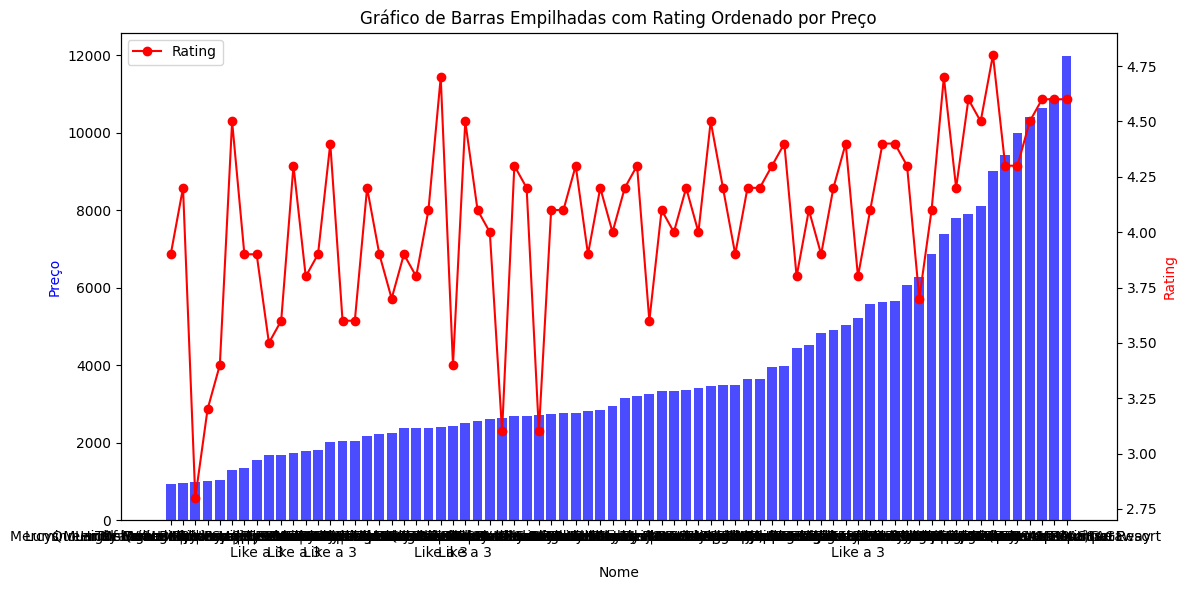

In [20]:


# Suponha que 'df' seja o seu DataFrame com colunas 'Name', 'Price' e 'Rating'

# Ordene o DataFrame pelos preços em ordem crescente
df_ordenado = df.sort_values(by='Price')

# Crie o gráfico de barras empilhadas com dois eixos Y
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Crie as barras para o "Price" no primeiro eixo Y
bar1 = ax1.bar(df_ordenado['Name'], df_ordenado['Price'], label='Price', color='b', alpha=0.7)

# Crie uma linha para o "Rating" no segundo eixo Y
line1 = ax2.plot(df_ordenado['Name'], df_ordenado['Rating'], marker='o', color='r', label='Rating')

# Configure os rótulos dos eixos
ax1.set_xlabel('Nome')
ax1.set_ylabel('Preço', color='b')
ax2.set_ylabel('Rating', color='r')

# Configure o título do gráfico
plt.title('Gráfico de Barras Empilhadas com Rating Ordenado por Preço')

# Rotacione os rótulos do eixo X para evitar sobreposição
plt.xticks(rotation=45, ha='right')

# Crie uma legenda para as barras e a linha
bars = [bar1[0], line1[0]]
labels = [bar.get_label() for bar in bars]
plt.legend(bars, labels, loc='upper left')

# Exiba o gráfico
plt.tight_layout()
plt.show()

* criar um valor baseado no preço e nota para fazer uma relação de custo-benefício
* fazer uma relação preço-distância


